In [8]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

Collect data on the top tech companies

In [9]:
# Top Tech Companies
ticker_tech_comp = ['GOOG', "AMZN", "FB", "AAPL", "MSFT"]
tech_comp = ["google","amazon","facebook","apple","microsoft"]                

In [1]:
def get_data_from_google(tickers):            
    if not os.path.exists('tech_stock_dfs'):
        os.makedirs('tech_stock_dfs')
        
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2017,6,20)
    
    for ticker in tickers:
        if not os.path.exists('tech_stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'google', start, end)
            df.to_csv('tech_stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
        
        

In [13]:
get_data_from_google(ticker_tech_comp)

With all the company data (csv), we only want the company close values for each day so rename the column "Close" into the company abbreviate name and remove all of the other columns. Append each of these columns together for all of the companies and return

In [3]:
# Create a csv file with all the company close rates
def compile_data(tickers):
    main_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('tech_stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        
        df.rename(columns = {'Close':ticker}, inplace=True)
        df.drop(['Open','High','Low','Volume'],1,inplace=True)
        
        if main_df.empty: # For the first column
            main_df = df
        else: # Join the columns
            main_df = main_df.join(df, how='outer')

    main_df.to_csv('tech_company_closes.csv') # Convert into a csv file
    

In [11]:
compile_data(ticker_tech_comp)

Green will be the highest correlated companies and red is the most negatively correlated companies

In [12]:
# Create a heatmap of the correlation values
def visualize_data():
    df = pd.read_csv('tech_company_closes.csv')
    df_corr = df.corr()
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
     
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()


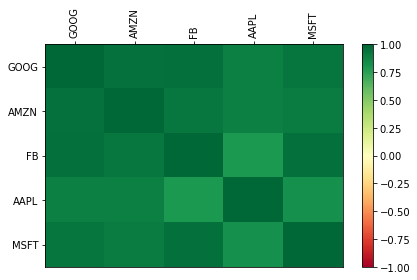

In [13]:
visualize_data()    

All of the companies are fairly correlated, which makes sense as they are all operating in the tech industry